In [139]:
import seaborn as sns

In [140]:
df=sns.load_dataset("diamonds")
df=df.dropna()
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [142]:
df=df.select_dtypes(["float64","int64"])
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [143]:
df_depth=df["depth"]
df_depth

0        61.5
1        59.8
2        56.9
3        62.4
4        63.3
         ... 
53935    60.8
53936    63.1
53937    62.8
53938    61.0
53939    62.2
Name: depth, Length: 53940, dtype: float64

In [144]:
df_depth.max()

79.0

In [145]:
df_depth.min()

43.0

<Axes: xlabel='depth'>

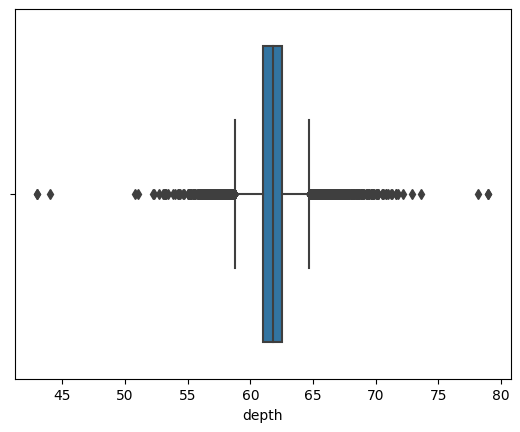

In [146]:
sns.boxplot(x=df_depth)

In [147]:
Q1=df_depth.quantile(0.25)
Q3=df_depth.quantile(0.75)
print(Q1)
Q3

61.0


62.5

In [148]:
IQR=Q3-Q1
alt_sinir=Q1-1.5*IQR
ust_sinir=Q3+1.5*IQR


In [149]:
alt_sinir    

58.75

In [150]:
ust_sinir

64.75

In [151]:
filtreleme=(df_depth<alt_sinir) | (df_depth>ust_sinir)
outlier=df_depth[filtreleme]

In [152]:
outlier

2        56.9
8        65.1
24       58.1
35       58.2
42       65.2
         ... 
53882    65.4
53886    58.0
53890    57.9
53895    57.8
53927    58.1
Name: depth, Length: 2545, dtype: float64

In [153]:
outlier.index

Int64Index([    2,     8,    24,    35,    42,    43,    84,    91,    95,
               97,
            ...
            53756, 53757, 53800, 53863, 53879, 53882, 53886, 53890, 53895,
            53927],
           dtype='int64', length=2545)

In [154]:
#deletion


In [155]:
import pandas as pd

df_depth=pd.DataFrame(df_depth)
print(df_depth)
clear_df=df_depth[~ (((df_depth<alt_sinir) | (df_depth>ust_sinir))).any(axis=1)]

       depth
0       61.5
1       59.8
2       56.9
3       62.4
4       63.3
...      ...
53935   60.8
53936   63.1
53937   62.8
53938   61.0
53939   62.2

[53940 rows x 1 columns]


In [156]:
clear_df

,depth
0,61.5
1,59.8
3,62.4
4,63.3
5,62.8
...,...
53935,60.8
53936,63.1
53937,62.8
53938,61.0


In [157]:
#ortalama ile doldurma

In [158]:
outlier

2        56.9
8        65.1
24       58.1
35       58.2
42       65.2
         ... 
53882    65.4
53886    58.0
53890    57.9
53895    57.8
53927    58.1
Name: depth, Length: 2545, dtype: float64

In [159]:
outlier=pd.DataFrame(outlier)

In [160]:
df_depth[filtreleme]=df_depth.mean()
df_depth[filtreleme]

,depth
2,61.749405
8,61.749405
24,61.749405
35,61.749405
42,61.749405
...,...
53882,61.749405
53886,61.749405
53890,61.749405
53895,61.749405


In [161]:
#baskılama

In [162]:
df=sns.load_dataset("diamonds")
df=df.dropna()

In [163]:
df_depth=df["depth"]
df_depth

0        61.5
1        59.8
2        56.9
3        62.4
4        63.3
         ... 
53935    60.8
53936    63.1
53937    62.8
53938    61.0
53939    62.2
Name: depth, Length: 53940, dtype: float64

In [164]:
df_depth[df_depth<alt_sinir]=alt_sinir
df_depth[df_depth>ust_sinir]=ust_sinir

C:\Users\msı\AppData\Local\Temp\ipykernel_11804\3664857245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_depth[df_depth<alt_sinir]=alt_sinir
C:\Users\msı\AppData\Local\Temp\ipykernel_11804\3664857245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_depth[df_depth>ust_sinir]=ust_sinir


In [165]:
df_depth

0        61.50
1        59.80
2        58.75
3        62.40
4        63.30
         ...  
53935    60.80
53936    63.10
53937    62.80
53938    61.00
53939    62.20
Name: depth, Length: 53940, dtype: float64